In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [385]:
data['race'].unique(), len(data['race'].unique())

(array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
        'Other'], dtype=object),
 5)

In [386]:
# +++ BEST VAR
print(f'Quantity People Of Each Race: \n{data.race.value_counts()}')

Quantity People Of Each Race: 
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [387]:
# Колличество по рассам VAR 2
race_count = data.groupby('race').count().reset_index()
race_count['count'] = race_count['age']
race_count[['race', 'count']]

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


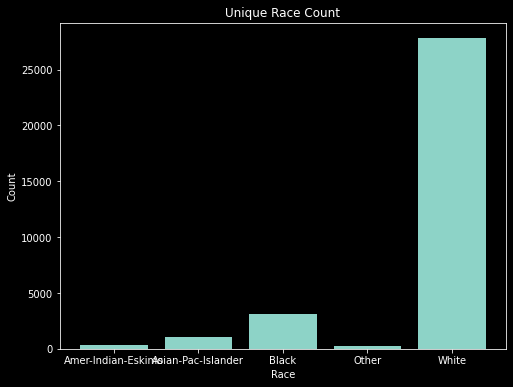

In [508]:
plt.figure(figsize=(8, 6))
plt.bar(race_count['race'], race_count['count'])
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Unique Race Count')
plt.show()

In [389]:
# средеий возраст
data['age'].mean()

38.58164675532078

In [390]:
# +++ Средний возраст мужчин 1
data_male = data[data.sex.isin(['Male'])]
data_male['age'].mean()

39.43354749885268

In [391]:
# +++ Средний возраст мужчин BEST VAR
average_age_men = data[data.sex.isin(['Male'])]['age'].mean().round(1)
print(f'Average Age Of Men: {average_age_men} years')

Average Age Of Men: 39.4 years


In [392]:
# средние показатели у мужчин
data[data.sex.isin(['Male'])].mean()

age                   39.433547
fnlwgt            191771.449013
education-num         10.102891
capital-gain        1329.370078
capital-loss         100.213309
hours-per-week        42.428086
dtype: float64

In [393]:
# Средний возраст женщин
average_age_women = data[data.sex.isin(['Female'])]['age'].mean().round(1)
print(f'Average Age Of Woman: {average_age_women} years')

Average Age Of Woman: 36.9 years


In [394]:
# Образование по количеству
edu_count = data.groupby('education').count().reset_index()
edu_count['count'] = edu_count['age']
edu_count[['education', 'count']]

,education,count
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5355


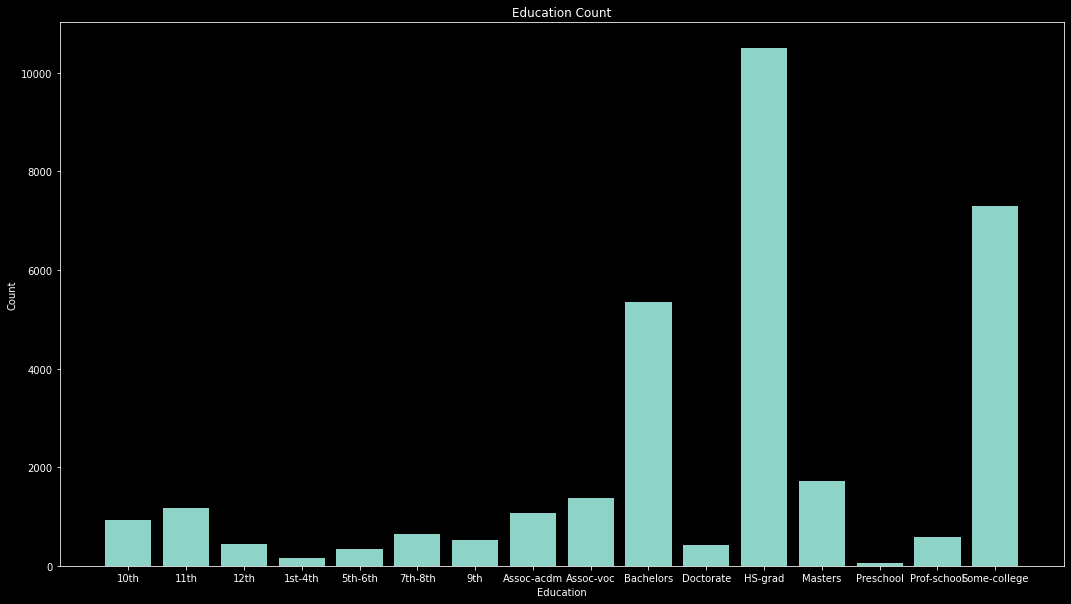

In [395]:
# график образования
plt.figure(figsize=(18, 10))
plt.bar(edu_count['education'], edu_count['count'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Count')
plt.show()

In [396]:
# Образование в поцентах +++
education_percentage = data['education'].value_counts(normalize=True)*100
education_percentage

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

In [397]:
# Процент с образованием Бакалавра +++
print('Bachelors: ' '%.1f' % education_percentage.Bachelors, '%')

Bachelors: 16.4 %


In [398]:
# доходы до 50К и выше 50К
salary_percentage = data['salary'].value_counts(normalize=True)*100
salary_percentage

<=50K    75.919044
>50K     24.080956
Name: salary, dtype: float64

In [399]:
# Образование. Добавляется столбец cat_educations
def higher_edu(education):
    if education in['Bachelors', 'Masters', 'Doctorate']:
        return 'higher_education'
    return 'lower_education'
data['cat_educations'] = data.education.apply(higher_edu)

data.cat_educations.value_counts(), data.cat_educations.value_counts(normalize=True)*100

(lower_education     25070
 higher_education     7491
 Name: cat_educations, dtype: int64,
 lower_education     76.99395
 higher_education    23.00605
 Name: cat_educations, dtype: float64)

In [400]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,cat_educations
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,higher_education
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,higher_education
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,lower_education
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,lower_education
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,higher_education


In [401]:
# Процент имеющих высшее образование и заработок более 50К ++++
higher_education_rich = (len(data[data['cat_educations'].isin(['higher_education'])]) & len(data[data['salary'].isin(['>50K'])])) / len(data[data['cat_educations'].isin(['higher_education'])]) * 100

print('Percentage With Higher Education & Earn >50K:', '%.1f' % higher_education_rich, '%')

Percentage With Higher Education & Earn >50K: 95.7 %


In [402]:
# Процент не имеющих высшее образование и заработок более 50К ++++
lower_education_rich = (len(data[data['cat_educations'].isin(['lower_education'])]) & len(data[data['salary'].isin(['>50K'])])) / len(data[data['cat_educations'].isin(['lower_education'])]) * 100

print('Percentage With Lower Education & Earn >50K:', '%.1f' % lower_education_rich, '%')

Percentage With Lower Education & Earn >50K: 0.6 %


In [403]:
# Минимальное количество рабочих часов в неделю +++++++
print(f"Minimum Number Hours A Person Works Per Week: {data['hours-per-week'].min()} hour")

Minimum Number Hours A Person Works Per Week: 1 hour


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

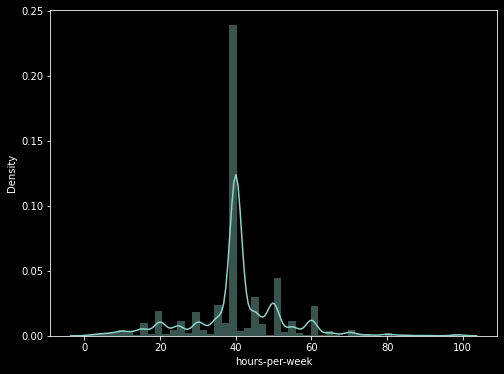

In [498]:
# график зависимости дохода от рабочего времени
plt.figure(figsize=(8, 6))
sns.distplot(data['hours-per-week'])

In [404]:
# Процент людей с минимальным рабочим временем зарабатыващих >50K ++++
rich_min_workers = (len(data[data['hours-per-week'] <= 20]) & len(data[data['salary'].isin(['>50K'])])) / (len(data[data['hours-per-week'] <= 20])) * 100

print("Percentage Of The People Who Work The Minimum Number Of Hours Per Week Have A Salary Of >50K: ", '%.1f' % rich_min_workers, '%')

Percentage Of The People Who Work The Minimum Number Of Hours Per Week Have A Salary Of >50K:  88.5 %


In [405]:
rich_man_workers = (len(data[data['hours-per-week'] >= 20]) & len(data[data['salary'].isin(['>50K'])])) / (len(data[data['hours-per-week'] >= 20])) * 100
rich_man_workers

20.32926078361474

In [434]:
# country has the highest percentage of people that earn >50K +++
country_highest = data.loc[data['salary'] == ">50K", 'native-country'].value_counts().index[0]

print(f'Country Has The Highest Of People That Earn >50K: {country_highest}')

Country Has The Highest Of People That Earn >50K: United-States


In [437]:
# +++
country_highest_percentage = len(data[(data['native-country'] == 'United-States') & (data['salary'] == '>50K')]) / len(data[data['native-country'] == 'United-States']) * 100

print('Country Has The Highest Percentage Of People That Earn >50K: ', '%.1f' % country_highest_percentage)

Country Has The Highest Percentage Of People That Earn >50K:  24.6


In [507]:
# 
top_country = data.groupby('native-country')[['salary']].count().sort_values('salary', ascending=False).head(20)
top_country.style.bar()


,salary
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [426]:
# Наиболее популярноное занятие в Индии с заработком >50K ++++++++
top_occupation_india = data[(data['native-country'] == 'India') & (data['salary'] == '>50K')].groupby('occupation')['occupation'].count().index[0]

print(f'Most Popular Occupation For Those Who Earn >50K In India: {top_occupation_india}')

Most Popular Occupation For Those Who Earn >50K In India: Adm-clerical


In [156]:
# Рабочие часы в неделю
print(f"Min: {data['hours-per-week'].min()}", f"\nMax: {data['hours-per-week'].max()}",  f"\nMean: {data['hours-per-week'].mean()}")

Min: 1 
Max: 99 
Mean: 40.437455852092995
